In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import idx2numpy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import scale 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [5]:
x_train = idx2numpy.convert_from_file("/content/drive/MyDrive/ml2022/3c/x_train")
y_train = idx2numpy.convert_from_file("/content/drive/MyDrive/ml2022/3c/y_train")
x_test = idx2numpy.convert_from_file("/content/drive/MyDrive/ml2022/3c/x_test")
y_test = idx2numpy.convert_from_file("/content/drive/MyDrive/ml2022/3c/y_test")

In [ ]:
y_df = pd.DataFrame(y_train)
y_df.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape(-1, 28*28)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
x_train = (x_train/256)
x_test = (x_test/256)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("/content/drive/MyDrive/ml2022/3c/x_train", "/content/drive/MyDrive/ml2022/3c/y_train",
        "train.csv", 60000)
convert("/content/drive/MyDrive/ml2022/3c/x_test", "/content/drive/MyDrive/ml2022/3c/y_test",
        "test.csv", 10000)

In [ ]:
train_df = pd.read_csv("train.csv",index_col=None)
train_df

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [ ]:
test_df = pd.read_csv("test.csv",index_col=None)
test_df

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516
0,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,8,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df[train_df.columns[len(train_df.columns)-1]].value_counts()

0     59773
1        70
2        26
3        11
5         7
      ...  
43        1
73        1
74        1
18        1
49        1
Name: 0.350, Length: 66, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val,y_train, y_val = train_test_split(x_train,y_train ,random_state=104,train_size=0.85, shuffle=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(51000, 784)
(51000,)
(9000, 784)
(9000,)
(10000, 784)
(10000,)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

In [ ]:
#sigmoid
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  1.0996231641702872
Validation set loss:  0.6409259422328192
Epoch : 1
Training set loss:  0.5226891363170028
Validation set loss:  0.46534119776123156
Epoch : 2
Training set loss:  0.4247467490253697
Validation set loss:  0.411817832400428
Epoch : 3
Training set loss:  0.38319415853196714
Validation set loss:  0.4001211732234049
Epoch : 4
Training set loss:  0.35818171228871815
Validation set loss:  0.3650929972974632
Epoch : 5
Training set loss:  0.3389820625033885
Validation set loss:  0.35700586860157607
Epoch : 6
Training set loss:  0.32381530990607216
Validation set loss:  0.34693187899917793
Epoch : 7
Training set loss:  0.31026122626659164
Validation set loss:  0.3444287100363064
Epoch : 8
Training set loss:  0.2992835451717744
Validation set loss:  0.34384102088202995
Epoch : 9
Training set loss:  0.29018157624121554
Validation set loss:  0.3375313406737408


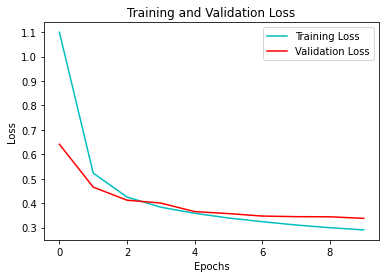

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = m1.predict(x_val)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# print(m1.score(x_val,y_val))
# print('Validation set Accuracy:',accuracy_score(y_val, y_pred))
# y_pred = m1.predict(x_test)
# print(m1.score(x_test,y_test))
# print('Test set Accuracy:',accuracy_score(y_test, y_pred))


In [ ]:
x_train.shape

(51000, 784)

In [ ]:
print("RELU")
m1 = MLPClassifier(activation = 'relu', hidden_layer_sizes =(256, 32),max_iter=10,batch_size = 128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

RELU
Epoch : 0
Training set loss:  0.5843421171298556
Validation set loss:  0.42859343077392636
Epoch : 1
Training set loss:  0.40080351427150235
Validation set loss:  0.40998554366194384
Epoch : 2
Training set loss:  0.3583088677147706
Validation set loss:  0.4042548806205707
Epoch : 3
Training set loss:  0.3297369995190107
Validation set loss:  0.35406714538518697
Epoch : 4
Training set loss:  0.30699870038674315
Validation set loss:  0.35055919059457546
Epoch : 5
Training set loss:  0.2886445846646554
Validation set loss:  0.3529073883389339
Epoch : 6
Training set loss:  0.27684501128479544
Validation set loss:  0.3485324673536264
Epoch : 7
Training set loss:  0.263385061242379
Validation set loss:  0.32357030702335304
Epoch : 8
Training set loss:  0.25337387218166607
Validation set loss:  0.31525369877883097
Epoch : 9
Training set loss:  0.23932379361226852
Validation set loss:  0.3313082034939969


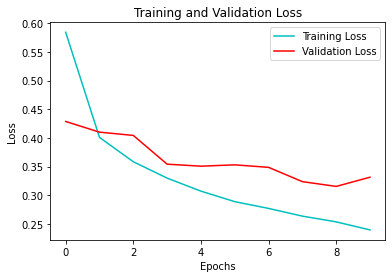

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("TANH")
m1 = MLPClassifier(activation = 'tanh', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

TANH
Epoch : 0
Training set loss:  0.5502463912772184
Validation set loss:  0.4289012663837311
Epoch : 1
Training set loss:  0.3863277075223829
Validation set loss:  0.38265464129294047
Epoch : 2
Training set loss:  0.3558656173781426
Validation set loss:  0.3684691085606807
Epoch : 3
Training set loss:  0.32872502351382776
Validation set loss:  0.35815817706610226
Epoch : 4
Training set loss:  0.3128178176131535
Validation set loss:  0.3355207343102043
Epoch : 5
Training set loss:  0.2954226960741559
Validation set loss:  0.35759227632438717
Epoch : 6
Training set loss:  0.2800375941044403
Validation set loss:  0.3548914113339647
Epoch : 7
Training set loss:  0.2706239075500165
Validation set loss:  0.32938588238934763
Epoch : 8
Training set loss:  0.25619732281685026
Validation set loss:  0.3259800778352284
Epoch : 9
Training set loss:  0.24708187722165117
Validation set loss:  0.3201910172898005


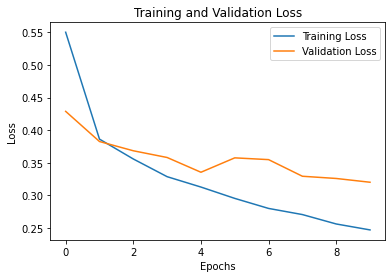

In [ ]:
epochs = range(1,99)
 
# Plot and label the training and validation loss values
plt.plot( t_losses, label='Training Loss')
plt.plot(v_losses, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
# plt.xticks(arange(0, 299, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [ ]:
print("LINEAR")
m1 = MLPClassifier(activation = 'identity', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

LINEAR
Epoch : 0
Training set loss:  0.5793446987994113
Validation set loss:  0.46648143368651834
Epoch : 1
Training set loss:  0.46181618856103795
Validation set loss:  0.4571156451175764
Epoch : 2
Training set loss:  0.44122452290687636
Validation set loss:  0.47121809311234725
Epoch : 3
Training set loss:  0.4304437498785005
Validation set loss:  0.4480047142339027
Epoch : 4
Training set loss:  0.42009069490507367
Validation set loss:  0.5031786829973128
Epoch : 5
Training set loss:  0.4178369017718339
Validation set loss:  0.4594306551741353
Epoch : 6
Training set loss:  0.41284235273806547
Validation set loss:  0.4450872536227063
Epoch : 7
Training set loss:  0.41130825266160653
Validation set loss:  0.45337573026296013
Epoch : 8
Training set loss:  0.40648355023190086
Validation set loss:  0.4587192713536823
Epoch : 9
Training set loss:  0.40315749720527067
Validation set loss:  0.4360833958221635


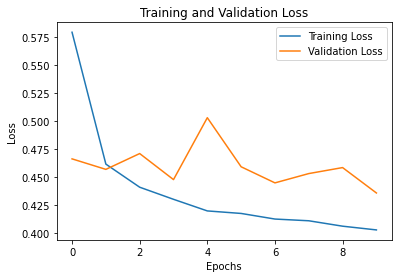

In [ ]:

plt.plot( t_losses, label='Training Loss')
plt.plot(v_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128,learning_rate_init=0.001)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  1.0949631636376291
Validation set loss:  0.6215384077004855
Epoch : 1
Training set loss:  0.5233153434654239
Validation set loss:  0.46227582931346034
Epoch : 2
Training set loss:  0.4300954811834484
Validation set loss:  0.4191631197747506
Epoch : 3
Training set loss:  0.3878211143951829
Validation set loss:  0.3871745095643299
Epoch : 4
Training set loss:  0.3623225293995475
Validation set loss:  0.37309450643637254
Epoch : 5
Training set loss:  0.34236681152300874
Validation set loss:  0.3595996589133187
Epoch : 6
Training set loss:  0.32656456992636
Validation set loss:  0.3504636750516439
Epoch : 7
Training set loss:  0.3125368872402963
Validation set loss:  0.34316654032795174
Epoch : 8
Training set loss:  0.30304042010831994
Validation set loss:  0.33268649817375956
Epoch : 9
Training set loss:  0.2912027637088236
Validation set loss:  0.33117452482344584


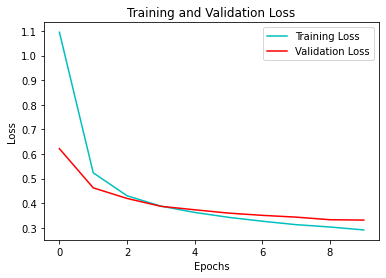

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128,learning_rate_init=0.1)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  2.3814680958174357
Validation set loss:  2.380723847497942
Epoch : 1
Training set loss:  2.373580456703037
Validation set loss:  2.3526051068700253
Epoch : 2
Training set loss:  2.418386454355064
Validation set loss:  2.3851247446140165
Epoch : 3
Training set loss:  2.414480099948081
Validation set loss:  2.480861844459931
Epoch : 4
Training set loss:  2.391323228367164
Validation set loss:  2.363030362803804
Epoch : 5
Training set loss:  2.4336759254226075
Validation set loss:  2.346156192640356
Epoch : 6
Training set loss:  2.4074837090102936
Validation set loss:  2.4409019610391414
Epoch : 7
Training set loss:  2.4742743508589644
Validation set loss:  2.416325766640188
Epoch : 8
Training set loss:  2.4473474010982477
Validation set loss:  2.349429234843113
Epoch : 9
Training set loss:  2.416737944986007
Validation set loss:  2.405493546294222


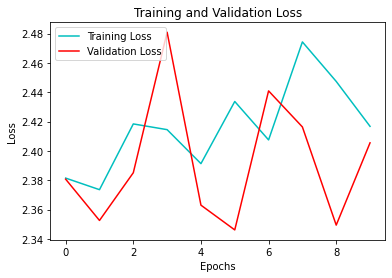

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256, 32),n_iter_no_change=10,batch_size=128,learning_rate_init=0.01)
t_losses = []
v_losses = []
for i in range(100):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  0.5969685590667337
Validation set loss:  0.522747011359211
Epoch : 1
Training set loss:  0.4230645662464453
Validation set loss:  0.42618763423471484
Epoch : 2
Training set loss:  0.3946380579928466
Validation set loss:  0.38619883607091965
Epoch : 3
Training set loss:  0.3811631337613465
Validation set loss:  0.3881840148115909
Epoch : 4
Training set loss:  0.3771713619406949
Validation set loss:  0.4085913528603178
Epoch : 5
Training set loss:  0.36016736558526363
Validation set loss:  0.3787386243419802
Epoch : 6
Training set loss:  0.35261428836663194
Validation set loss:  0.4027816272050411
Epoch : 7
Training set loss:  0.34782923293027274
Validation set loss:  0.3617308843589042
Epoch : 8
Training set loss:  0.3426531094345627
Validation set loss:  0.3705085808639221
Epoch : 9
Training set loss:  0.3437412072268471
Validation set loss:  0.37811767861017537
Epoch : 10
Training set loss:  0.341263523917363
Validation set loss:  0.38077210301203

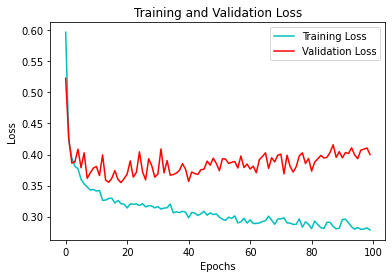

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
#c

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256,16),n_iter_no_change=10,batch_size=128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  1.3482552875430087
Validation set loss:  0.8716511255399536
Epoch : 1
Training set loss:  0.7333694994223943
Validation set loss:  0.630429984881494
Epoch : 2
Training set loss:  0.5681664192036846
Validation set loss:  0.5130300268261146
Epoch : 3
Training set loss:  0.47062472296414
Validation set loss:  0.4563549428056563
Epoch : 4
Training set loss:  0.4130065875676305
Validation set loss:  0.4094327763745158
Epoch : 5
Training set loss:  0.3791883559044352
Validation set loss:  0.38631117569515555
Epoch : 6
Training set loss:  0.3541079373381512
Validation set loss:  0.36511023455767794
Epoch : 7
Training set loss:  0.33544741089583424
Validation set loss:  0.3600925058885066
Epoch : 8
Training set loss:  0.3208477866759594
Validation set loss:  0.35740797126656476
Epoch : 9
Training set loss:  0.30703712192047217
Validation set loss:  0.3471489738897232


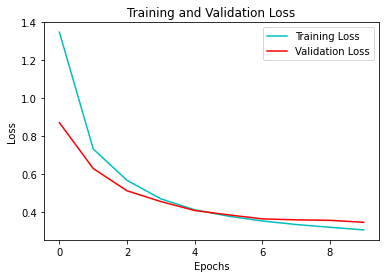

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(128, 32),n_iter_no_change=10,batch_size=128)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  1.2706314089308566
Validation set loss:  0.7459976090662583
Epoch : 1
Training set loss:  0.6028844041991366
Validation set loss:  0.5109184224852733
Epoch : 2
Training set loss:  0.45830130141028347
Validation set loss:  0.43907336230250466
Epoch : 3
Training set loss:  0.40219107718258956
Validation set loss:  0.3990282340287887
Epoch : 4
Training set loss:  0.3716998379395708
Validation set loss:  0.38417818742479765
Epoch : 5
Training set loss:  0.35320690357841616
Validation set loss:  0.3687715383588715
Epoch : 6
Training set loss:  0.3366240271716322
Validation set loss:  0.35681122361757434
Epoch : 7
Training set loss:  0.3229213776745464
Validation set loss:  0.34449676026547477
Epoch : 8
Training set loss:  0.3133004958520656
Validation set loss:  0.35139755958987534
Epoch : 9
Training set loss:  0.3030691755171668
Validation set loss:  0.34742565538945774


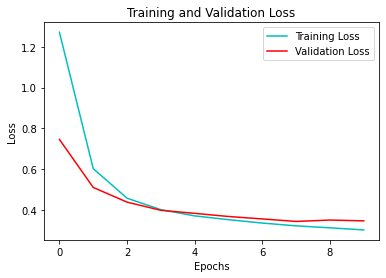

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(64, 8),n_iter_no_change=10,batch_size=128,learning_rate_init=0.01)
t_losses = []
v_losses = []
for i in range(10):
  print("Epoch :",i)
  m1.partial_fit(x_train, y_train, classes=y_train)
  train_loss = m1.loss_
  t_losses.append(train_loss)
  print('Training set loss: ',train_loss)
  y_pred = m1.predict_proba(x_val)
  val_loss = log_loss(y_val,y_pred)
  v_losses.append(val_loss)
  print('Validation set loss: ',val_loss)

SIGMOID
Epoch : 0
Training set loss:  0.9296572820263658
Validation set loss:  0.5665594597666195
Epoch : 1
Training set loss:  0.5033687164955435
Validation set loss:  0.4975098353029899
Epoch : 2
Training set loss:  0.43822447607095777
Validation set loss:  0.45210897827224056
Epoch : 3
Training set loss:  0.4103699472919406
Validation set loss:  0.43094861452414596
Epoch : 4
Training set loss:  0.39748440157196563
Validation set loss:  0.42976467499927345
Epoch : 5
Training set loss:  0.38454254224559997
Validation set loss:  0.40762861196552513
Epoch : 6
Training set loss:  0.3714178663442049
Validation set loss:  0.3968597394023007
Epoch : 7
Training set loss:  0.36714651028235046
Validation set loss:  0.4099309256605212
Epoch : 8
Training set loss:  0.3573276199905219
Validation set loss:  0.39939253935724717
Epoch : 9
Training set loss:  0.34928789267895577
Validation set loss:  0.37948976660650785


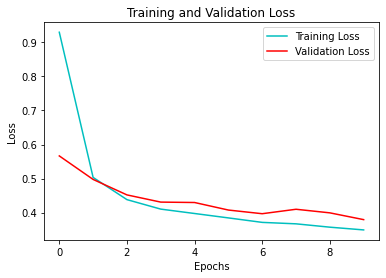

In [ ]:
plt.plot( t_losses, label='Training Loss',color = 'c')
plt.plot(v_losses, label='Validation Loss',color = 'r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

In [ ]:
y_df = pd.DataFrame(y_train)
y_df.value_counts()

0    5132
2    5114
8    5112
6    5111
4    5105
5    5104
9    5102
1    5088
7    5073
3    5059
dtype: int64

In [9]:
model=MLPClassifier()
parameters={'hidden_layer_sizes': [(256,128),(32,16)],
            "activation":["tanh","logistic"],
            "learning_rate_init":[0.1,0.01,0.001],
            "max_iter" : [40],'batch_size': [64,128,256]}
grid=GridSearchCV(model,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

{'activation': 'tanh', 'batch_size': 256, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.001, 'max_iter': 40}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp_gs = MLPClassifier(max_iter=30)
parameter_space = {
    'hidden_layer_sizes': [(256,128,64),(32,16,8)],
    'activation': ['logistic', 'tanh'],
    'learning_rate_init': [0.1,0.01,0.001],
    'n_iter_no_change': [30],
    'batch_size': [64,128,256]
}
m = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
m.fit(x_train, y_train)

In [ ]:

y_pred = m.predict(x_val)
val_loss = log_loss(y_val,y_pred)
print(val_loss)
# t_losses = []
# v_losses = []
# for i in range(100):
#   print("Epoch :",i)
#   m.fit(x_train, y_train)
#   train_loss = m.loss_
#   t_losses.append(train_loss)
#   print('Training set loss: ',train_loss)
#   y_pred = m.predict_proba(x_val)
#   val_loss = log_loss(y_val,y_pred)
#   v_losses.append(val_loss)
#   print('Validation set loss: ',val_loss)

In [ ]:
print('Best parameters found:\n', m.best_params_)